# Credit Fraud Detection

Anonymized credit card transactions labeled as fraudulent or genuine

* Source: https://www.kaggle.com/datasets/whenamancodes/fraud-detection

## About Data
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [37]:
import warnings
warnings.filterwarnings("ignore")


# 1. Importing relevant libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

sns.set()
%matplotlib inline

# 2. Loading raw data

In [39]:
df_raw = pd.read_csv('creditcard.csv')
df_raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 3. EDA

In [40]:
df_raw.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [41]:
# Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
# It looks like unimportant. We'll drop that.

df=df_raw.drop(['Time'], axis=1)

In [42]:
df.shape

(284807, 30)

In [43]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [45]:
# All categories are numerical (except target 'Class' which is boolean)

In [46]:
len(df[df['Class'] == 1])

492

In [47]:
len(df[df['Class'] == 0])

284315

In [48]:
# There is a huge disproportion in data. Only 0,17% is a fraud data.

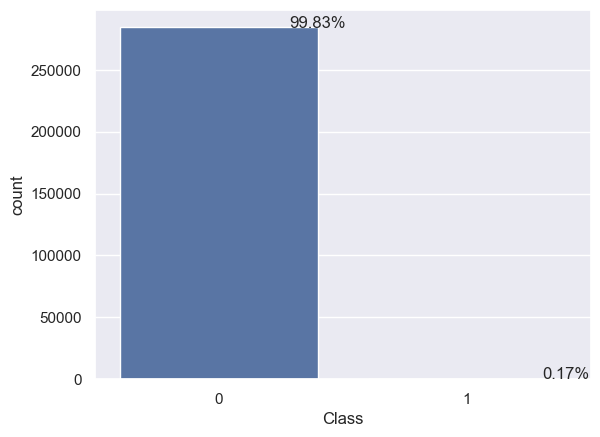

In [49]:
ax = sns.countplot(x='Class',data=df)
total = float(len(df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

In [50]:
df.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

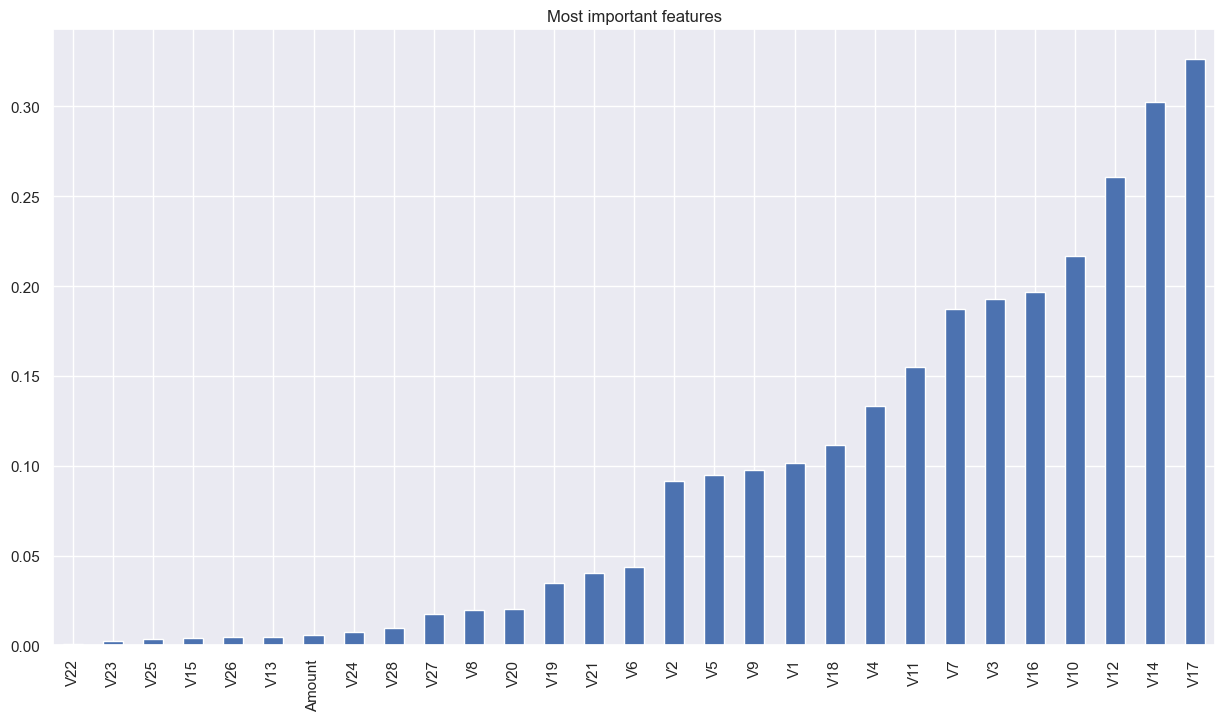

In [51]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [52]:
# Let's peak all features with correlation 0.15 and morec = 

c = df.corr()['Class'][:-1].abs() > 0.15

print (c)

V1        False
V2        False
V3         True
V4        False
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


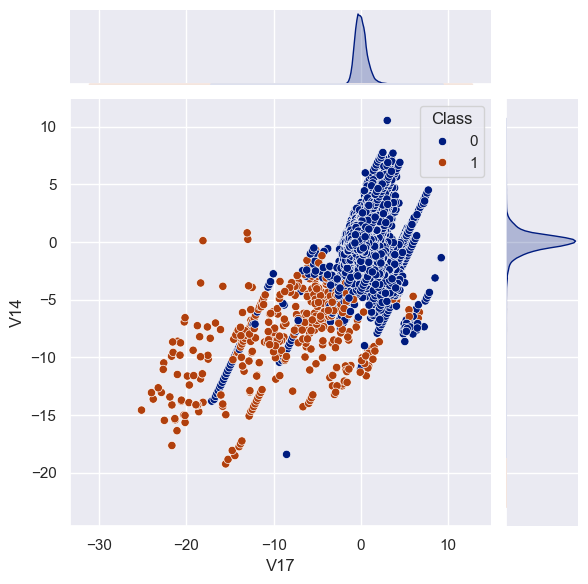

In [53]:
sns.jointplot(x='V17', y='V14',hue='Class', data=df, palette = 'dark')

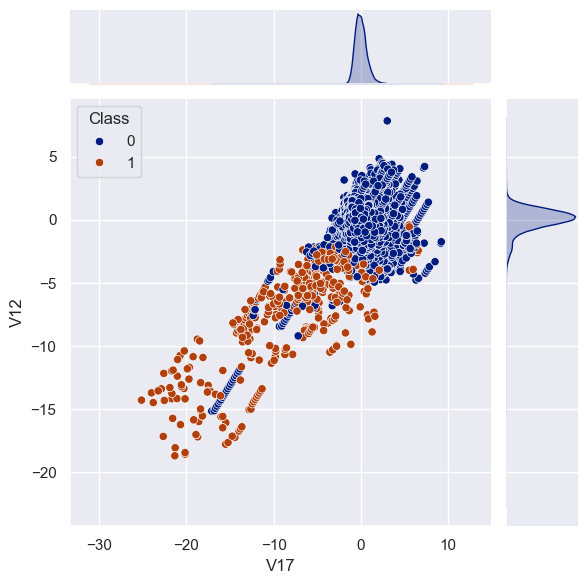

In [54]:
sns.jointplot(x='V17', y='V12',hue='Class', data=df, palette = 'dark')

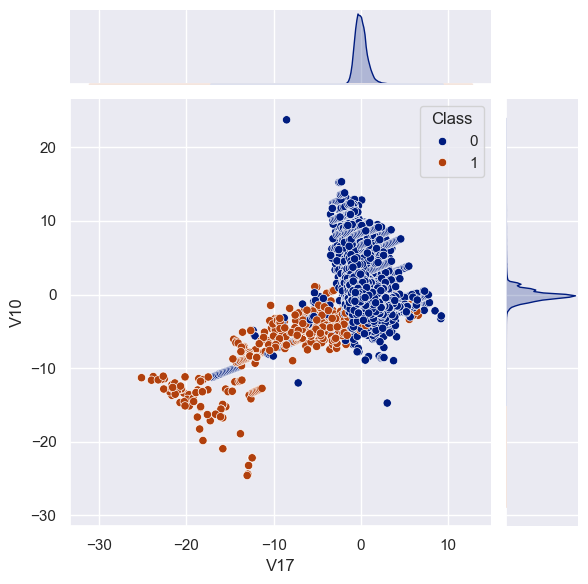

In [55]:
sns.jointplot(x='V17', y='V10',hue='Class', data=df, palette = 'dark')

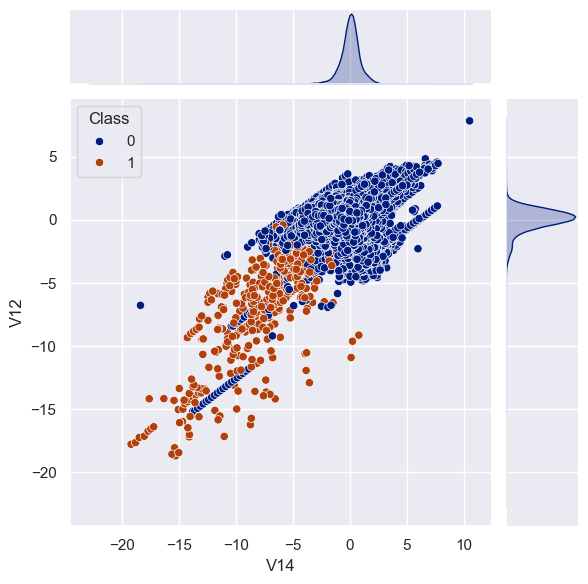

In [56]:
sns.jointplot(x='V14', y='V12',hue='Class', data=df, palette = 'dark')

# 4. Feature engineering

## Outlier detection

Let's check the distribution of the features with 0,13 and higher and correlation

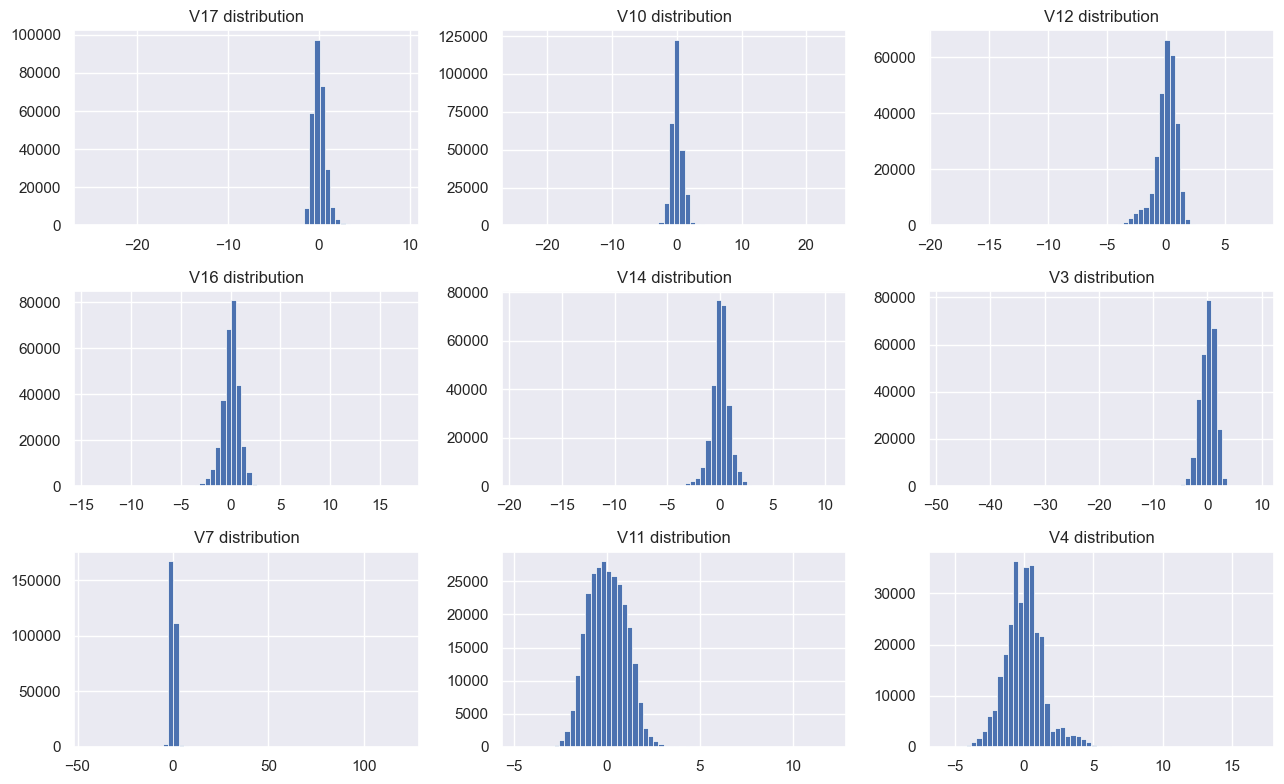

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

It looks like we have a lot of outliers here. We can try to get rid of them.

## Tukey's IQR method

Tukey’s  (1977)  technique  is  used  to  detect  outliers  in  univariate  distributions  for symmetric as well as in slightly skewed data sets. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. 

In [58]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_indices = []
    
    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # appending the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detecting outliers
Outliers_IQR = detect_outliers(df,2,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [59]:
len(Outliers_IQR)

47116

In [60]:
df_out

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237686,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
237687,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
237688,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
237689,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


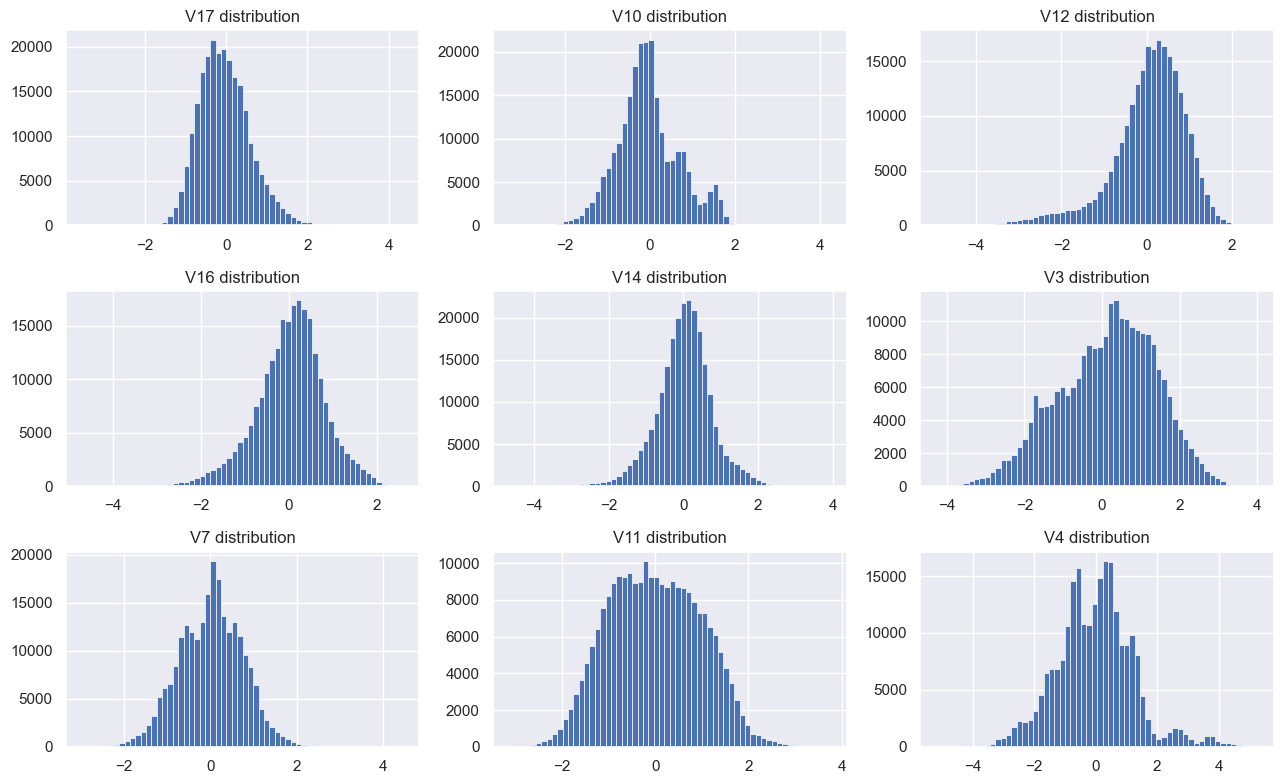

In [61]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df_out['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [62]:
# Let's check if we didn't drop too many important information accidentally

In [63]:
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Class'] == 1]))

The amount of frauds in df before dropping outliers:  492


In [64]:
print ('The amount of frauds in df afret dropping outliers: ', len(df_out[df_out['Class'] == 1]))

The amount of frauds in df afret dropping outliers:  43


It looks like outliers are very similar to fraud values and we dropped most of them!

Let's create a new df with dropped outliers only.

In [65]:
Outliers_df2 = df.loc[df.index[Outliers_IQR]]

In [66]:
len(Outliers_df2)

47116

In [67]:
Outliers_df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
140,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
146,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,6.427802,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
164,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275573,-2.796570,-1.602426,0.553124,-0.972816,-0.090899,0.423694,0.037604,0.500683,-1.163213,-0.218494,...,-0.766574,-1.794549,-0.536869,0.233628,0.208626,-0.435249,0.509353,-0.512349,283.20,0
277296,-0.514141,0.949264,-1.164256,-0.687624,0.784550,1.162172,1.753924,-0.052698,0.015033,-0.785415,...,-0.209018,-0.107877,0.148562,-0.421933,-0.589293,0.238553,-0.676694,-0.584556,195.40,0
277581,-0.112954,0.944074,-2.352370,0.944593,0.767084,-0.491613,1.898752,0.062521,-1.224329,0.218670,...,0.714246,1.895837,0.441559,0.729273,-1.048663,-0.415093,0.407531,0.354169,197.72,0
280989,-0.303032,0.515443,-2.395964,-0.052680,0.454179,-1.607054,2.039611,-0.188682,-0.446324,-0.439347,...,0.671690,1.721186,0.444797,-0.004811,-1.012256,-0.141775,0.369032,0.314705,214.20,0


In [68]:
Outliers_df2['Class'].value_counts()

Class
0    46667
1      449
Name: count, dtype: int64

In [69]:
# Train/Test split

X = Outliers_df2.drop('Class',axis=1).values
y = Outliers_df2['Class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [70]:
# Scaling data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Training

In [72]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# List of all classification models to test
all_classification_models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Support Vector Machine", SVC(probability=True)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Multi-layer Perceptron", MLPClassifier()),
    ("XGBoost Classifier", xgb.XGBClassifier())
]

# Create an empty list to store results for all classification models
all_classification_results = []

# Iterate over the combined list of all classification models
for name, model in all_classification_models:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict probabilities on training and testing data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Predict classes
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy and AUC for training and testing
    accuracy_train = accuracy_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_prob)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_prob)

    # Append the results
    all_classification_results.append({
        "Model": name,
        "Accuracy (Train)": accuracy_train,
        "AUC (Train)": auc_train,
        "Accuracy (Test)": accuracy_test,
        "AUC (Test)": auc_test
    })


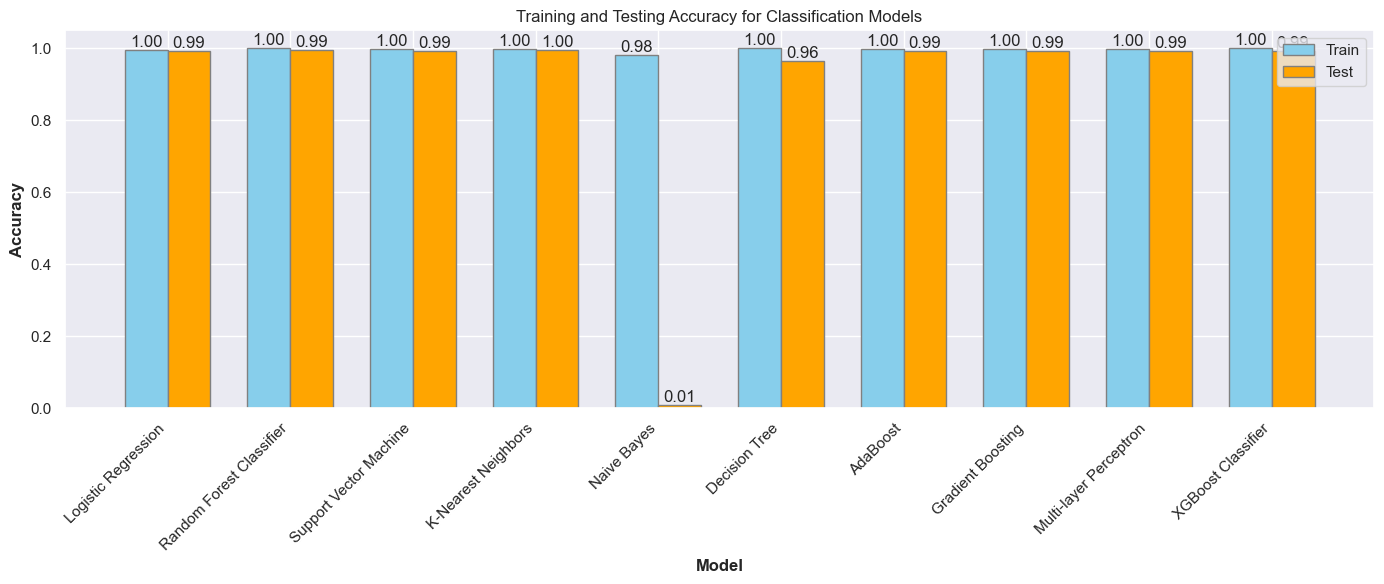

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names
model_names = [result["Model"] for result in all_classification_results]

# Extract accuracy values
train_accuracy = [result["Accuracy (Train)"] for result in all_classification_results]
test_accuracy = [result["Accuracy (Test)"] for result in all_classification_results]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(14, 6))

# Plot training accuracy
train_bars = plt.bar(r1, train_accuracy, color='skyblue', width=bar_width, edgecolor='grey', label='Train')

# Plot testing accuracy
test_bars = plt.bar(r2, test_accuracy, color='orange', width=bar_width, edgecolor='grey', label='Test')

# Adding labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45, ha='right')
plt.title('Training and Testing Accuracy for Classification Models')

# Adding legend
plt.legend()

# Add value labels on each bar peak for training accuracy
for bar in train_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '{:.2f}'.format(height), ha='center', va='bottom')

# Add value labels on each bar peak for testing accuracy
for bar in test_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '{:.2f}'.format(height), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


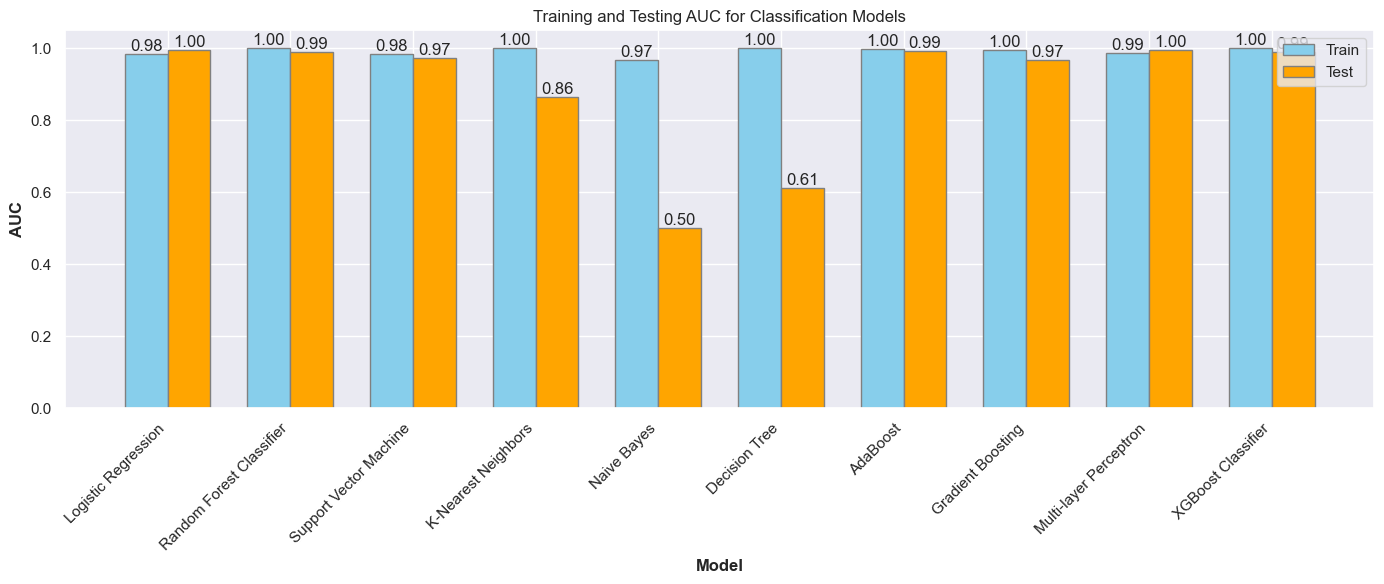

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names
model_names = [result["Model"] for result in all_classification_results]

# Extract AUC values
train_auc = [result["AUC (Train)"] for result in all_classification_results]
test_auc = [result["AUC (Test)"] for result in all_classification_results]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(14, 6))

# Plot training AUC
train_bars = plt.bar(r1, train_auc, color='skyblue', width=bar_width, edgecolor='grey', label='Train')

# Plot testing AUC
test_bars = plt.bar(r2, test_auc, color='orange', width=bar_width, edgecolor='grey', label='Test')

# Adding labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('AUC', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45, ha='right')
plt.title('Training and Testing AUC for Classification Models')

# Adding legend
plt.legend()

# Add value labels on each bar peak for training AUC
for bar in train_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '{:.2f}'.format(height), ha='center', va='bottom')

# Add value labels on each bar peak for testing AUC
for bar in test_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '{:.2f}'.format(height), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


## Selectiong the best Model

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Fitting Logistic Regression to the training set
model_l = LogisticRegression()
model_l.fit(X_train, y_train)

# Predict classes
y_train_pred = model_l.predict(X_train)
y_test_pred = model_l.predict(X_test)

# Calculate accuracy and AUC for training and testing
accuracy_train = accuracy_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, model_l.predict_proba(X_train)[:, 1])

accuracy_test = accuracy_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, model_l.predict_proba(X_test)[:, 1])

print("AUC score is: ", auc_test)



AUC score is:  0.9950870479667189


AUC Score: 0.9950870479667189


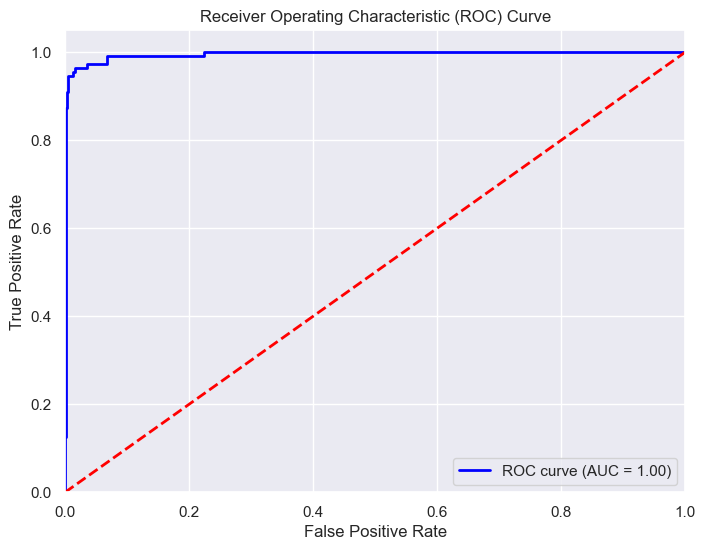

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC score
auc = roc_auc_score(y_test, y_test_prob)
print("AUC Score:", auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Using Selected features with all data

In [47]:
X = df.loc[:, ['Amount','V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V18']].values
y = df['Class'].values
X.shape

(284807, 10)

In [48]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [49]:
# Scaling data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# List of all classification models to test
all_classification_models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Support Vector Machine", SVC(probability=True)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Multi-layer Perceptron", MLPClassifier()),
    ("XGBoost Classifier", xgb.XGBClassifier())
]

# Create an empty list to store results for all classification models
all_classification_results = []

# Iterate over the combined list of all classification models
for name, model in all_classification_models:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict probabilities on training and testing data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Predict classes
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy and AUC for training and testing
    accuracy_train = accuracy_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_prob)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_prob)

    # Append the results
    all_classification_results.append({
        "Model": name,
        "Accuracy (Train)": accuracy_train,
        "AUC (Train)": auc_train,
        "Accuracy (Test)": accuracy_test,
        "AUC (Test)": auc_test
    })


C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


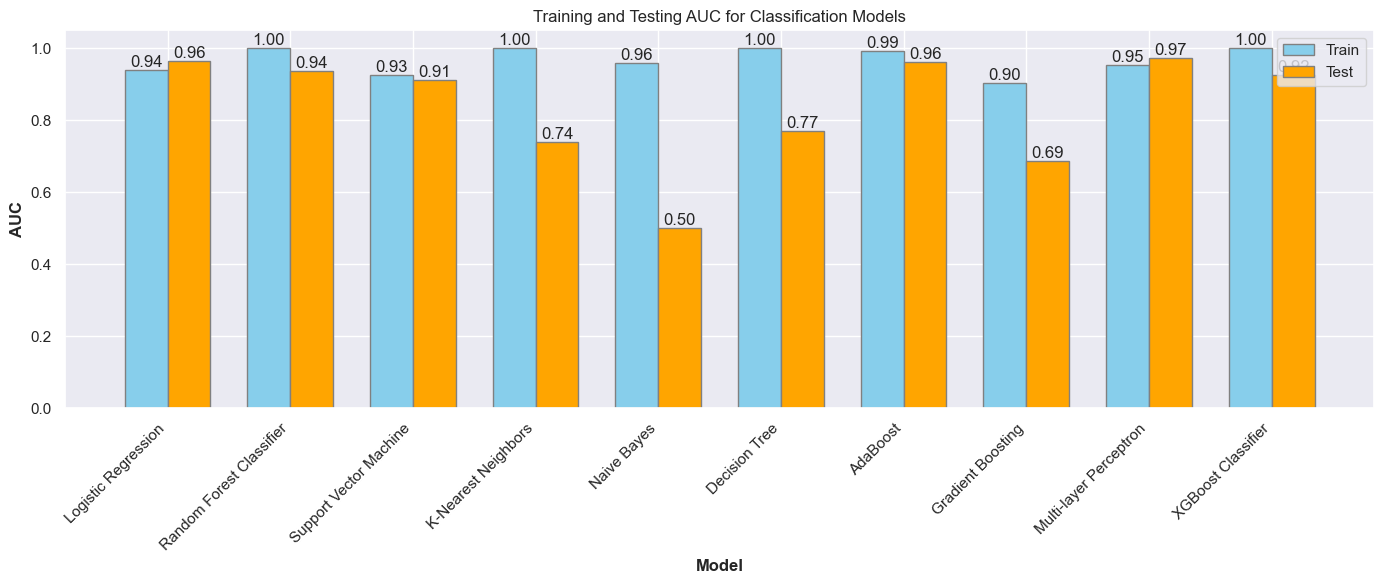

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names
model_names = [result["Model"] for result in all_classification_results]

# Extract AUC values
train_auc = [result["AUC (Train)"] for result in all_classification_results]
test_auc = [result["AUC (Test)"] for result in all_classification_results]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(14, 6))

# Plot training AUC
train_bars = plt.bar(r1, train_auc, color='skyblue', width=bar_width, edgecolor='grey', label='Train')

# Plot testing AUC
test_bars = plt.bar(r2, test_auc, color='orange', width=bar_width, edgecolor='grey', label='Test')

# Adding labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('AUC', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45, ha='right')
plt.title('Training and Testing AUC for Classification Models')

# Adding legend
plt.legend()

# Add value labels on each bar peak for training AUC
for bar in train_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '{:.2f}'.format(height), ha='center', va='bottom')

# Add value labels on each bar peak for testing AUC
for bar in test_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '{:.2f}'.format(height), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()
